In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [7]:
path = r"C:\Users\resha\Downloads\zomato_data.csv"
df = pd.read_csv(path)

In [8]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [9]:
print(df.describe(include="all"))

       Restaurant Name  Customer Rating  Cuisine Type     Location  \
count             5000      5000.000000   5000.000000  5000.000000   
unique            5000              NaN           NaN          NaN   
top       Restaurant_0              NaN           NaN          NaN   
freq                 1              NaN           NaN          NaN   
mean               NaN         2.987160      1.990400     2.015800   
std                NaN         1.159643      1.430775     1.401408   
min                NaN         1.000000      0.000000     0.000000   
25%                NaN         2.000000      1.000000     1.000000   
50%                NaN         3.000000      2.000000     2.000000   
75%                NaN         4.000000      3.000000     3.000000   
max                NaN         5.000000      4.000000     4.000000   

        Average Price for Two  Service Speed (mins)  \
count             5000.000000           5000.000000   
unique                    NaN                   N

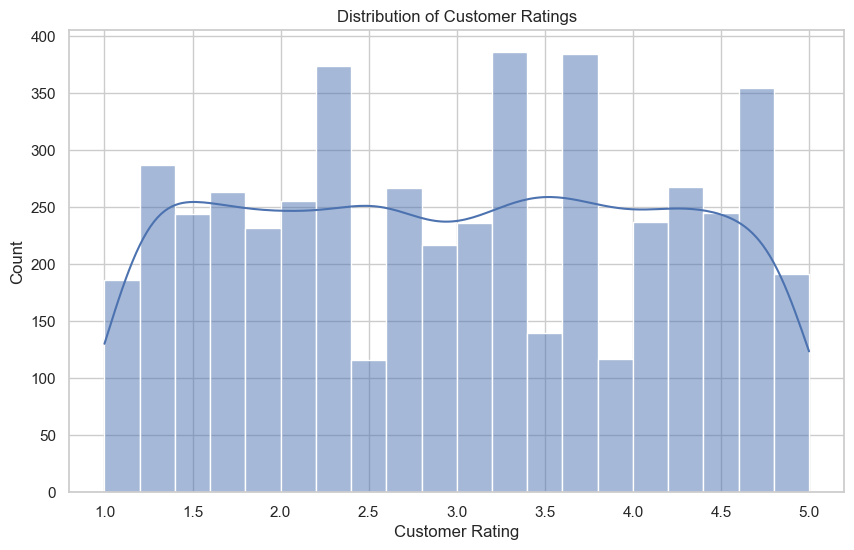

In [10]:
# Graph 1
sns.histplot(df["Customer Rating"], bins=20, kde=True)
plt.title("Distribution of Customer Ratings")
plt.show()


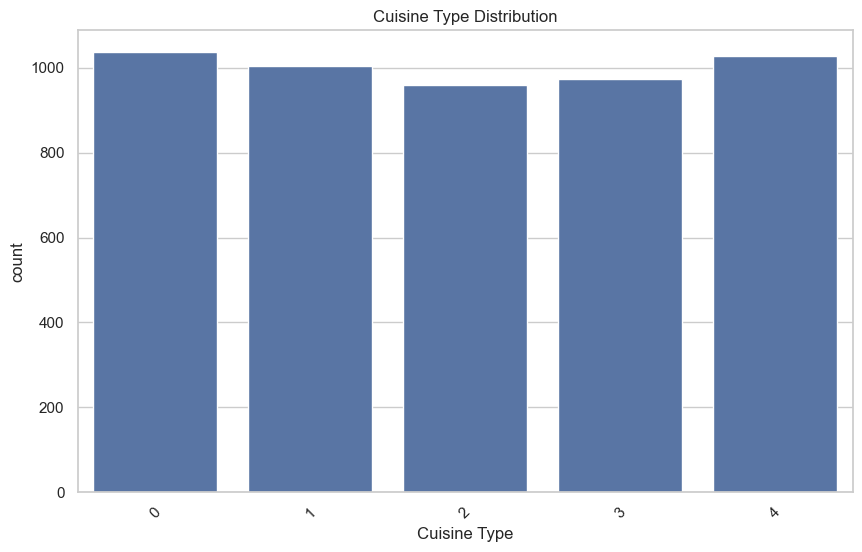

In [11]:
# Graph 2
sns.countplot(x="Cuisine Type", data=df)
plt.title("Cuisine Type Distribution")
plt.xticks(rotation=45)
plt.show()

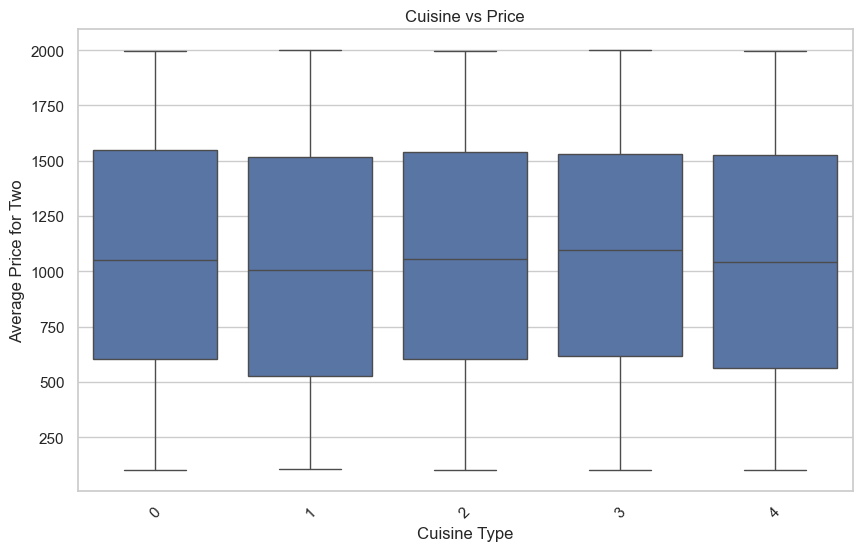

In [12]:
# Graph 3
sns.boxplot(x="Cuisine Type", y="Average Price for Two", data=df)
plt.title("Cuisine vs Price")
plt.xticks(rotation=45)
plt.show()

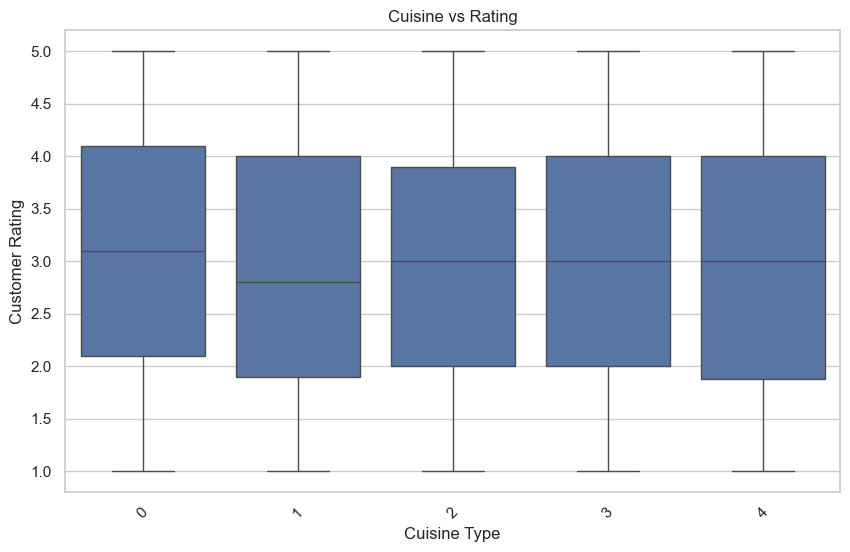

In [13]:
# Graph 4
sns.boxplot(x="Cuisine Type", y="Customer Rating", data=df)
plt.title("Cuisine vs Rating")
plt.xticks(rotation=45)
plt.show()

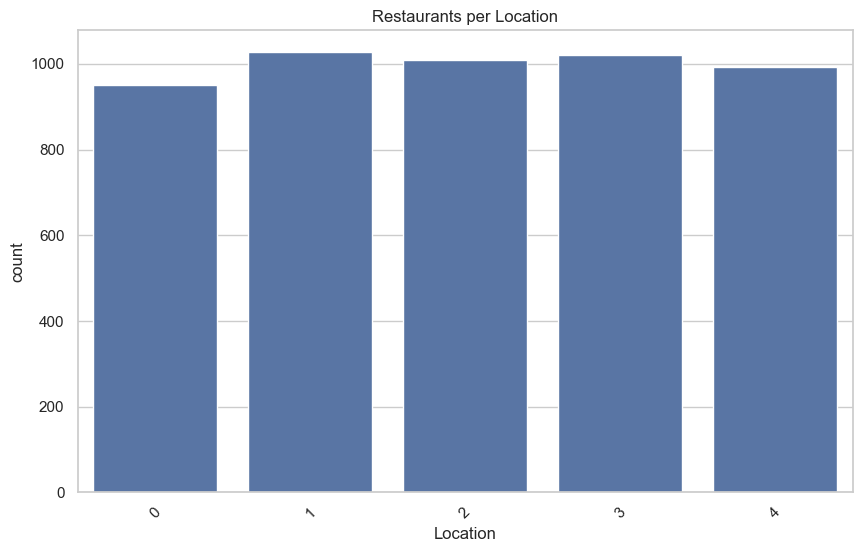

In [14]:
# Graph 5
sns.countplot(x="Location", data=df)
plt.title("Restaurants per Location")
plt.xticks(rotation=45)
plt.show()

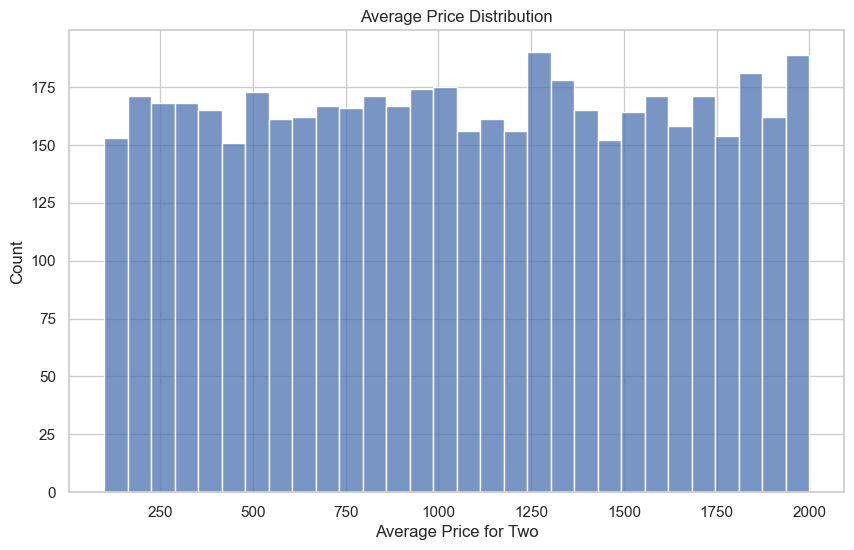

In [15]:
# Graph 6
sns.histplot(df["Average Price for Two"], bins=30)
plt.title("Average Price Distribution")
plt.show()


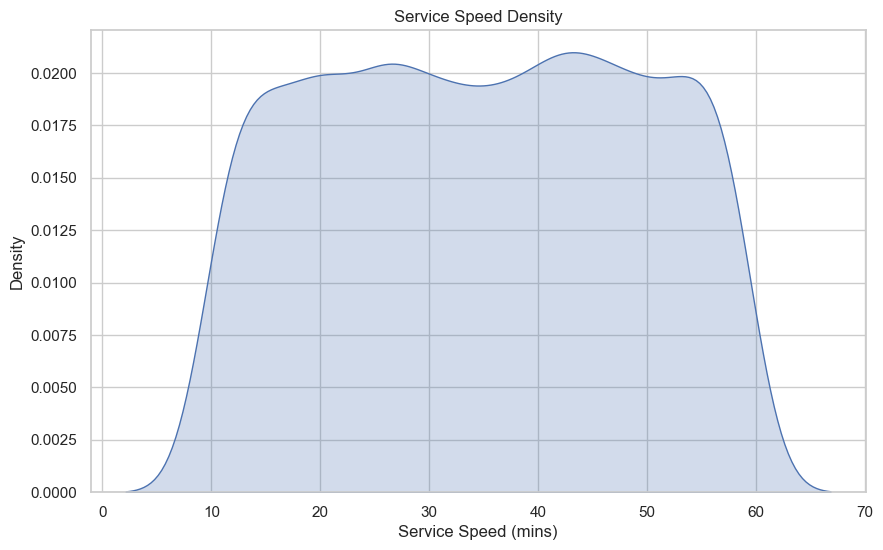

In [16]:
# Graph 7
sns.kdeplot(df["Service Speed (mins)"], fill=True)
plt.title("Service Speed Density")
plt.show()

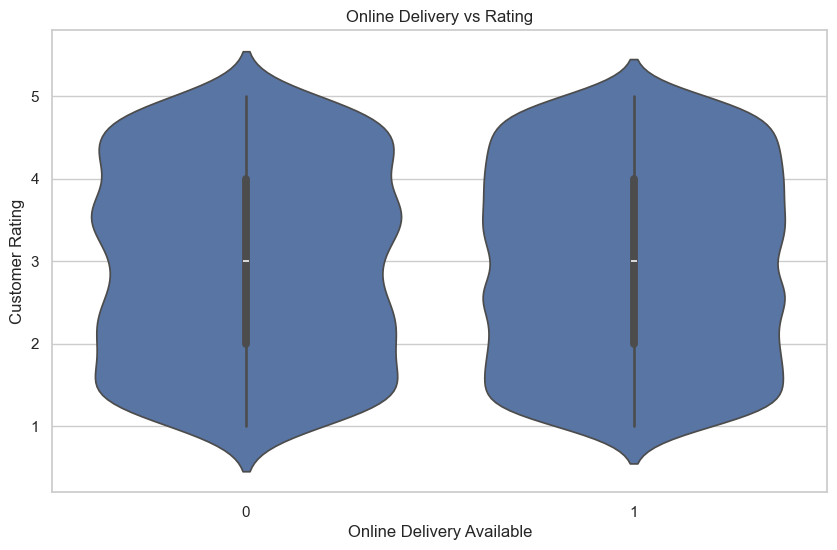

In [17]:
# Graph 8
sns.violinplot(x="Online Delivery Available", y="Customer Rating", data=df)
plt.title("Online Delivery vs Rating")
plt.show()

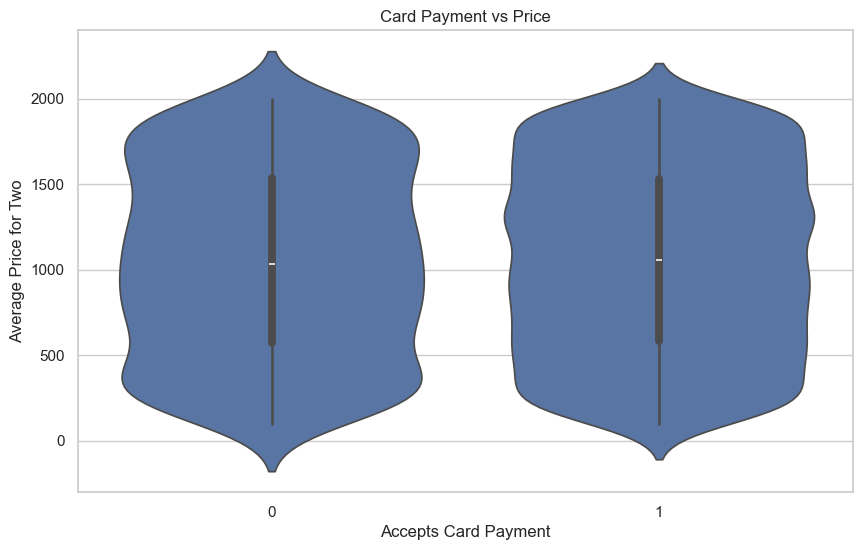

In [18]:
# Graph 9
sns.violinplot(x="Accepts Card Payment", y="Average Price for Two", data=df)
plt.title("Card Payment vs Price")
plt.show()

In [19]:
df_new = df[[i for i in df.columns if df[i].dtypes != 'O']]

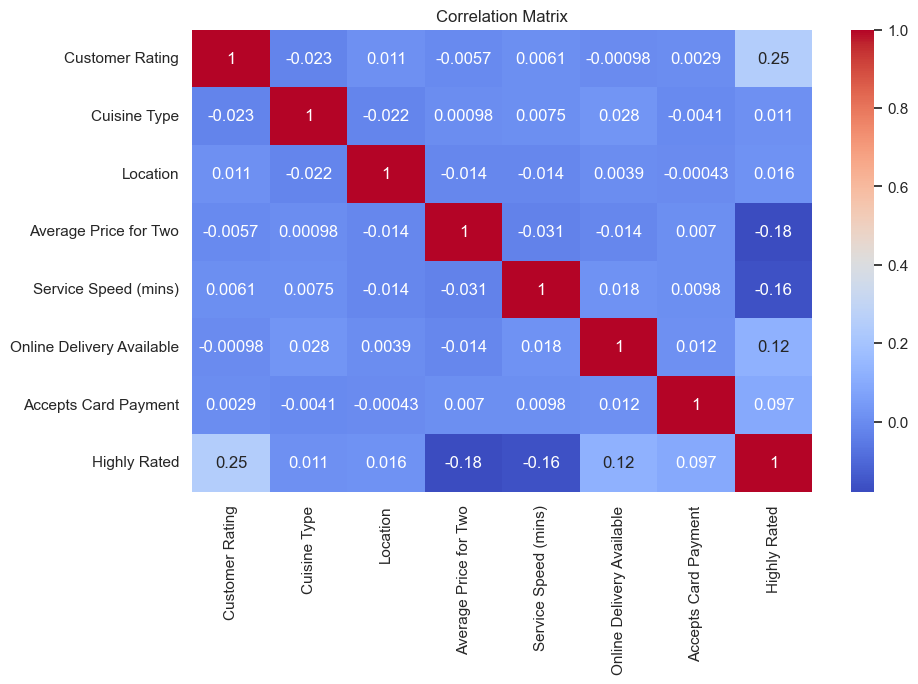

In [20]:
# Graph 10
sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

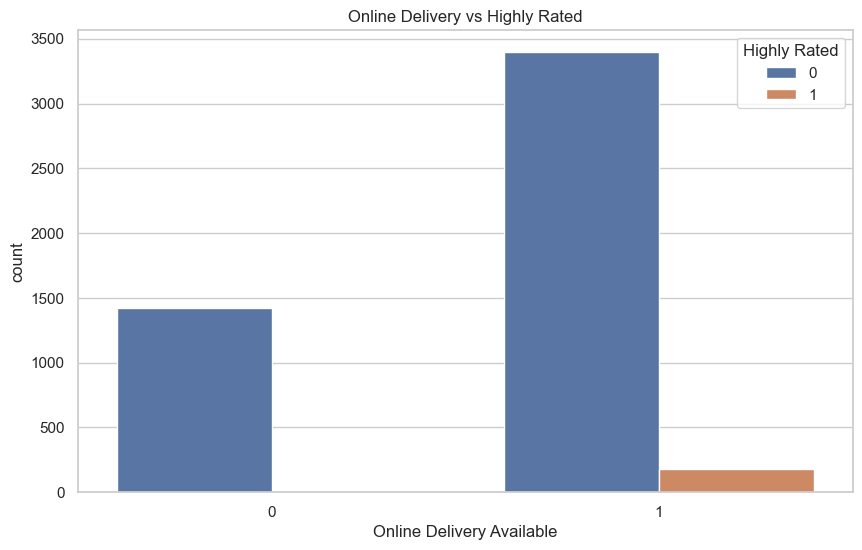

In [21]:
# Graph 11
sns.countplot(x="Online Delivery Available", hue="Highly Rated", data=df)
plt.title("Online Delivery vs Highly Rated")
plt.show()

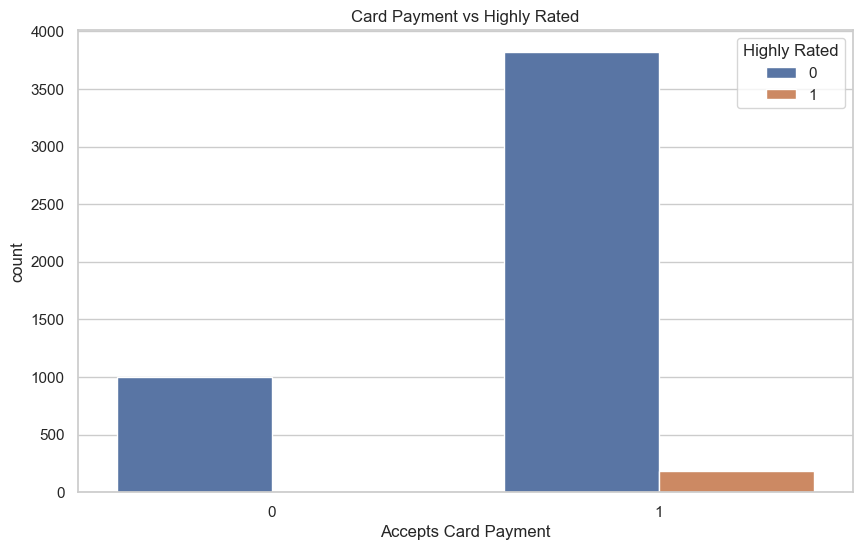

In [22]:
# Graph 12
sns.countplot(x="Accepts Card Payment", hue="Highly Rated", data=df)
plt.title("Card Payment vs Highly Rated")
plt.show()

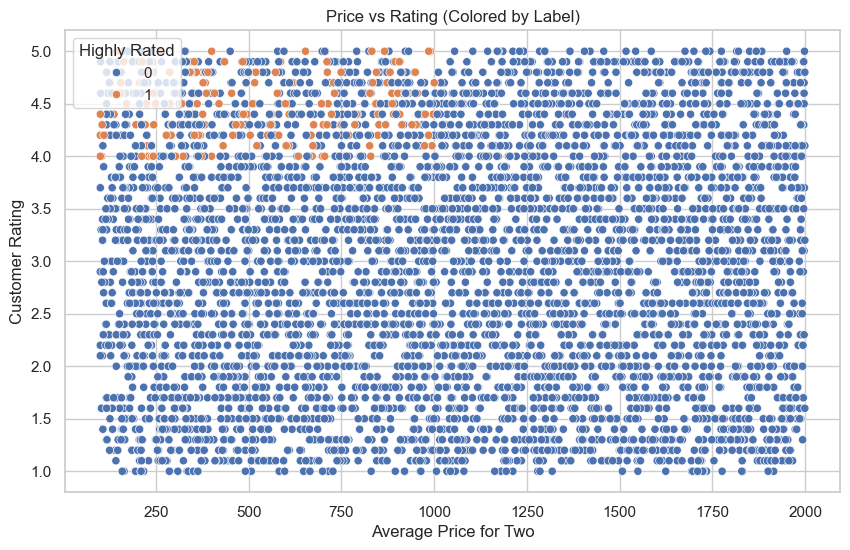

In [23]:
# Graph 13
sns.scatterplot(x="Average Price for Two", y="Customer Rating", hue="Highly Rated", data=df)
plt.title("Price vs Rating (Colored by Label)")
plt.show()

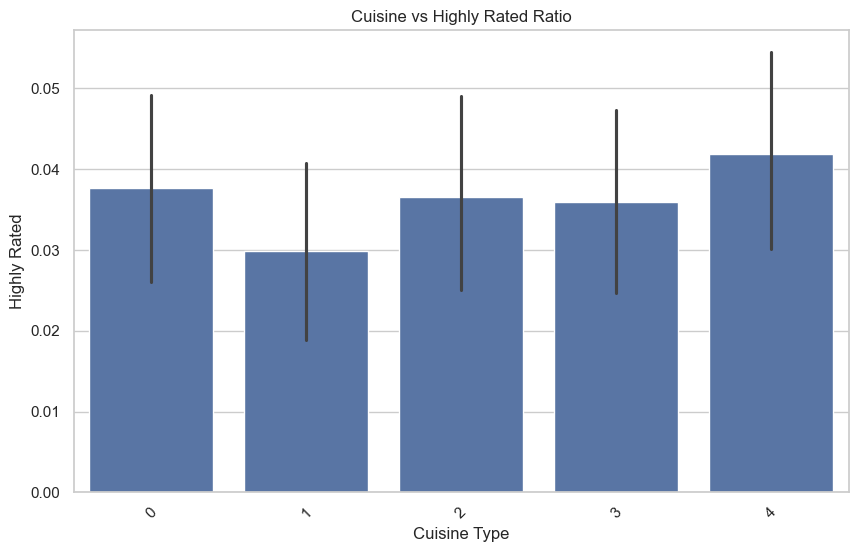

In [24]:
# Graph 14
sns.barplot(x="Cuisine Type", y="Highly Rated", data=df)
plt.title("Cuisine vs Highly Rated Ratio")
plt.xticks(rotation=45)
plt.show()

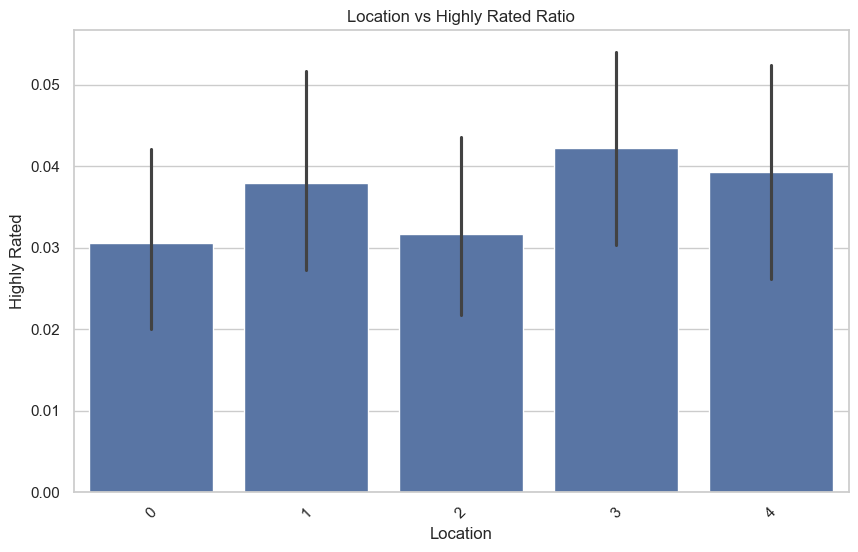

In [25]:
# Graph 15
sns.barplot(x="Location", y="Highly Rated", data=df)
plt.title("Location vs Highly Rated Ratio")
plt.xticks(rotation=45)
plt.show()

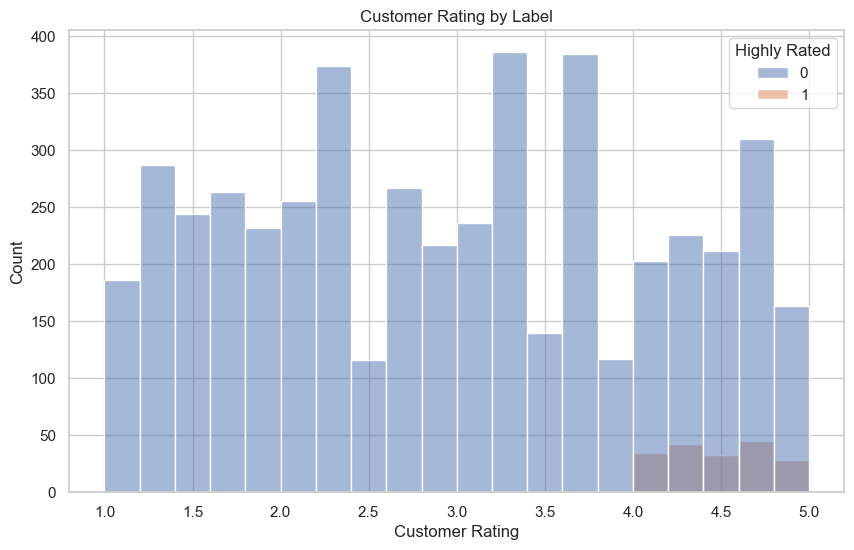

In [26]:
# Graph 16
sns.histplot(data=df, x="Customer Rating", hue="Highly Rated", bins=20)
plt.title("Customer Rating by Label")
plt.show()

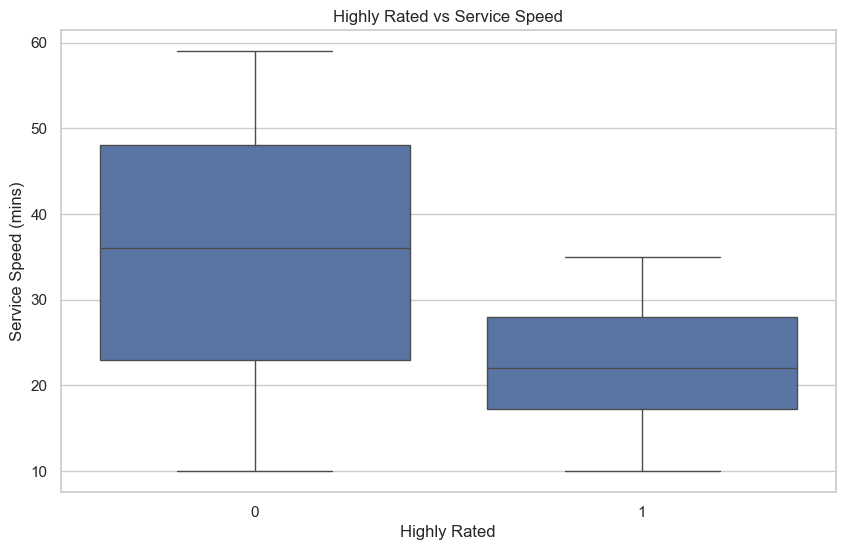

In [27]:
# Graph 17
sns.boxplot(x="Highly Rated", y="Service Speed (mins)", data=df)
plt.title("Highly Rated vs Service Speed")
plt.show()

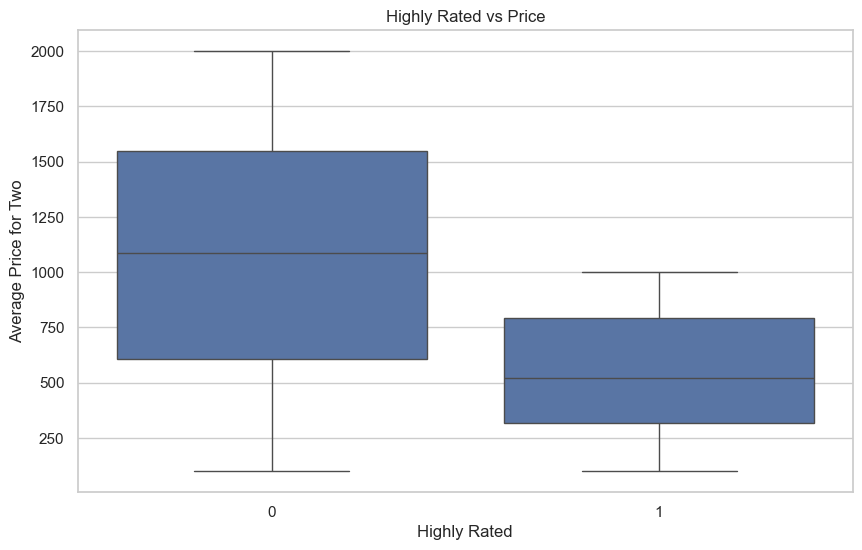

In [28]:
# Graph 18
sns.boxplot(x="Highly Rated", y="Average Price for Two", data=df)
plt.title("Highly Rated vs Price")
plt.show()

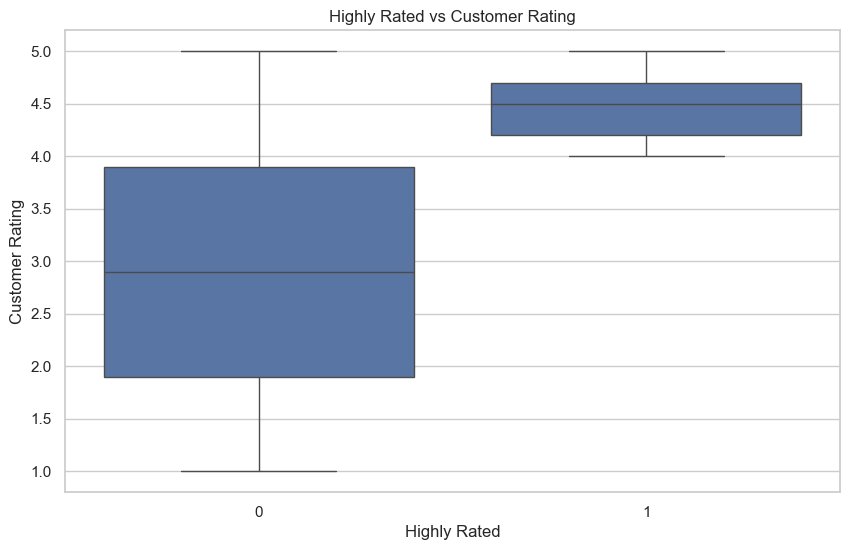

In [29]:
# Graph 19
sns.boxplot(x="Highly Rated", y="Customer Rating", data=df)
plt.title("Highly Rated vs Customer Rating")
plt.show()

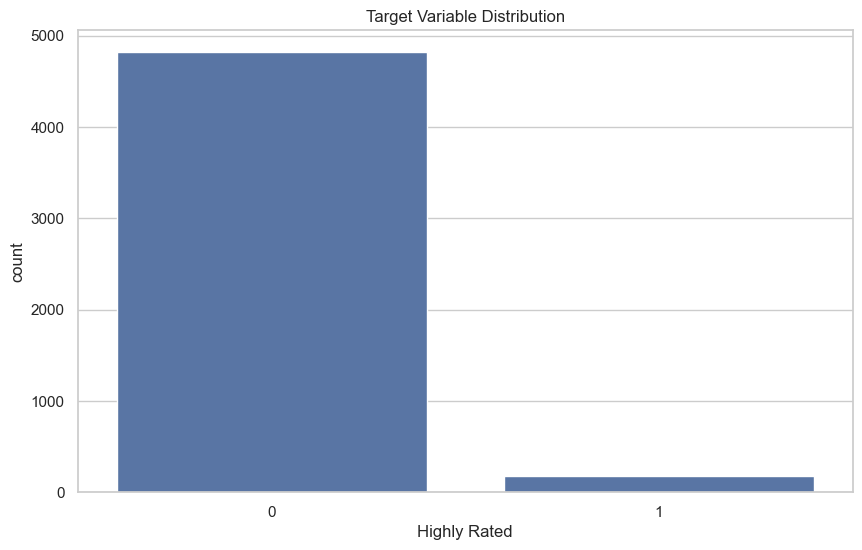

In [30]:
# Graph 20
sns.countplot(x="Highly Rated",data = df)
plt.title("Target Variable Distribution")
plt.show()


In [31]:
df_encoded = df.copy()
df_encoded["Cuisine Type"] = df_encoded["Cuisine Type"].astype("category").cat.codes
df_encoded["Location"] = df_encoded["Location"].astype("category").cat.codes

In [32]:
X = df_encoded.drop(columns=["Restaurant Name", "Highly Rated"])
y = df_encoded["Highly Rated"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy * 100:.2f}%\n")


 Model Accuracy: 100.00%



In [36]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       956
           1       1.00      1.00      1.00        44

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

